# Análisis de tendencias en spotify

### Fecha de inicio: 04/08/2025
### Elaborado por: Camilo Guzmán

## Descripción.

Este proyecto explora un dataset de libre acceso extraído de la plataforma Kaggle, que contiene información acerca de las canciones, artistas y popularidad de una playlist con más de 6000 canciones. Y tiene como finalidad practicar habilidades en Python y análisis de datos.

## Composición del dataset.

El dataset utilizado **"spotify_tracks.csv"** está compuesto por las siguientes columnas:

- **id:** Identificador único de cada canción en spotify.
- **name:** Nombre de la canción.
- **genre:** Género de la canción.
- **artists:** Nombre de los artistas que participaron en la canción, separados por comas en el caso de que sean varios artistas.
- **album:** Nombre del álbum al cual pertenece cada canción.
- **popularity:** Poplaridad de cada canción medida en una escala de 0 a 100, donde 0 es el puntaje más bajo y 100 el más alto.
- **duration_ms:** Duración de la canción en milisegundos.
- **explicit:** Valor booleano que indica si la canción tiene contenido explícito.

## Objetivo:

El objetivo principal de este proyecto es aplicar técnicas de análisis de datos con Python utilizando un dataset de canciones extraído de [Kaggle](https://www.kaggle.com/datasets/ambaliyagati/spotify-dataset-for-playing-around-with-sql). Para ello, se busca:

- Explorar la distribución de géneros musicales en la playlist.
- Identificar los artistas más frecuentes.
- Analizar la duración media de las canciones.
- Estudiar la relación entre popularidad y otras variables (como duración y contenido explícito).
- Desarrollar visualizaciones que permitan interpretar fácilmente los datos.
- Practicar habildiades de limpieza, transformación y análisis de datos con pandas, matplotlib y seaborn.

## Preguntas guía:

- ¿Qué géneros musicales son más frecuentes en la playlist estudiada?
- ¿Qué artistas musicales tienen mayor presencia?
- ¿Cuánto tiempo en promedio duran las canciones que componen la playlist?
- ¿Qué relación existe entre la popularidad y la duración de las canciones?
- ¿Qué relación existe entre la popularidad y la presencia de contenido explícito en la duración de las canciones?
- ¿Qué relación existe entre la popularidad y el género?
- ¿Cuál es el álbum más popular?
- ¿Cuál es el artista más popular?

## 1. Importación de librerías y datos

En este proyecto se utilizarán las bibliotecas Pandas, Numpy, Mat

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Creación e inspección del dataframe

Se utilizará como insumo el dataset **spotify_tracks.csv** extraído de [Kaggle](https://www.kaggle.com/datasets/ambaliyagati/spotify-dataset-for-playing-around-with-sql).

In [51]:
spotify = pd.read_csv('C:/Users/57310/Desktop/PythonStudying/PythonProjects/02_spotify_dataset/data/spotify_tracks.csv')
spotify.head()

,id,name,genre,artists,album,popularity,duration_ms,explicit
0,7kr3xZk4yb3YSZ4VFtg2Qt,Acoustic,acoustic,Billy Raffoul,1975,58,172199,False
1,1kJygfS4eoVziBBI93MSYp,Acoustic,acoustic,Billy Raffoul,A Few More Hours at YYZ,57,172202,False
2,6lynns69p4zTCRxmmiSY1x,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),42,144786,False
3,1RC9slv335IfLce5vt9KTW,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,46,116573,False
4,5o9L8xBuILoVjLECSBi7Vo,My Love Mine All Mine - Acoustic Instrumental,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),33,133922,False


In [52]:
spotify.tail()

,id,name,genre,artists,album,popularity,duration_ms,explicit
6295,4uveHSzaz8YEbTF9j6QlCI,Voyage to Atlantis,world-music,Future World Music,Reign of Vengeance,25,180001,False
6296,4u15cjyziW2Ewn5Ek3082l,L'Oiseau,world-music,"Putumayo, Marianne Perrudin, Thomas Artaud",Global Relaxation by Putumayo,25,276776,False
6297,56pHPaTeX2O9aVmTFYS8hV,The Daintree,world-music,Joseph Tawadros,World Music,12,69533,False
6298,6Ldyc5TsR4kaUsuHKcB2AD,The Sorcerers Symphony,world-music,Future World Music,Behold,26,90001,False
6299,3ry0f8ybk8upUBIk8unvmF,Fiore d'inverno,world-music,"Putumayo, Giacomo Lariccia",World Party 5 by Putumayo,25,141800,False


### 2.1. Inspección de los tipos de datos

In [53]:
spotify.dtypes

id             object
name           object
genre          object
artists        object
album          object
popularity      int64
duration_ms     int64
explicit         bool
dtype: object

In [54]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6300 entries, 0 to 6299
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           6300 non-null   object
 1   name         6300 non-null   object
 2   genre        6300 non-null   object
 3   artists      6300 non-null   object
 4   album        6300 non-null   object
 5   popularity   6300 non-null   int64 
 6   duration_ms  6300 non-null   int64 
 7   explicit     6300 non-null   bool  
dtypes: bool(1), int64(2), object(5)
memory usage: 350.8+ KB


**Observaciones:**
- Cada columna contiene 6300 datos.
- Todas las columnas tienen asignado correctamente el tipo de dato.

### 2.2. Conteo de valores nulos presentes en cada columna

In [55]:
print(spotify.isnull().sum())

id             0
name           0
genre          0
artists        0
album          0
popularity     0
duration_ms    0
explicit       0
dtype: int64


**Observaciones:**
- Ninguna columna contiene valores nulos

### 2.3. Detección y corrección de duplicados

In [56]:
print(spotify.duplicated().sum())

0


**Observaciones:**
- No se encuentran registros duplicados

### 2.4. Estandarización de nombres de columnas

Renombrar columnas para legibilidad, siguiendo los siguientes parámetros:

- Los nombres de las columnas no pueden empezar ni terminar con espacios.
- Los nombres de las columnas deben estar en minúsculas.
- Si el nombre de una columna está compuesto por varias palabras, estas deben estar separadas por un guión bajo '_'.

In [57]:
spotify.columns = spotify.columns.str.strip() # Elimina espacios que se encuentren en los extremos del nombre
spotify.columns = spotify.columns.str.lower() # Asigna todos los nombres en letras minúsculas
spotify.columns = spotify.columns.str.replace(' ', '_') # Reemplaza los espacios por guiones bajos

spotify.head()

,id,name,genre,artists,album,popularity,duration_ms,explicit
0,7kr3xZk4yb3YSZ4VFtg2Qt,Acoustic,acoustic,Billy Raffoul,1975,58,172199,False
1,1kJygfS4eoVziBBI93MSYp,Acoustic,acoustic,Billy Raffoul,A Few More Hours at YYZ,57,172202,False
2,6lynns69p4zTCRxmmiSY1x,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),42,144786,False
3,1RC9slv335IfLce5vt9KTW,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,46,116573,False
4,5o9L8xBuILoVjLECSBi7Vo,My Love Mine All Mine - Acoustic Instrumental,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),33,133922,False


### 2.5. Limpieza de strings

Se estandarizan los valores de tipo string, teniendo en cuenta los siguientes aspectos:

- No pueden empezar ni terminar con espacios.
- Deben estar en minúscula, para evitar errores en los cuales python cuente los datos "Acoustic" y "acoustic" como valores diferentes.
- La única columna de tipo string que no se estandarizará es **id**, debido a que es un dato alfanumérico que contiene variaciones en letras mayúsculas.

In [58]:
# Se eliminan espacios laterales en las columnas name, genre, artists y album
spotify['name'] = spotify['name'].str.strip()
spotify['genre'] = spotify['genre'].str.strip()
spotify['artists'] = spotify['artists'].str.strip()
spotify['album'] = spotify['album'].str.strip()

# Se transforman en minúsculas los carácteres de las columnas name, genre, artists y album
spotify['name'] = spotify['name'].str.lower()
spotify['genre'] = spotify['genre'].str.lower()
spotify['artists'] = spotify['artists'].str.lower()
spotify['album'] = spotify['album'].str.lower()

spotify.head()

,id,name,genre,artists,album,popularity,duration_ms,explicit
0,7kr3xZk4yb3YSZ4VFtg2Qt,acoustic,acoustic,billy raffoul,1975,58,172199,False
1,1kJygfS4eoVziBBI93MSYp,acoustic,acoustic,billy raffoul,a few more hours at yyz,57,172202,False
2,6lynns69p4zTCRxmmiSY1x,here comes the sun - acoustic,acoustic,"molly hocking, bailey rushlow",here comes the sun (acoustic),42,144786,False
3,1RC9slv335IfLce5vt9KTW,acoustic #3,acoustic,the goo goo dolls,dizzy up the girl,46,116573,False
4,5o9L8xBuILoVjLECSBi7Vo,my love mine all mine - acoustic instrumental,acoustic,"guus dielissen, casper esmann",my love mine all mine (acoustic instrumental),33,133922,False


### 2.6. Guardado de dataframe limpio

In [59]:
spotify.to_csv(r"C:\Users\57310\Desktop\PythonStudying\PythonProjects\02_spotify_dataset\data\spotify_limpio.csv", index=False)

### 2.7. Análisis exploratorio general

Antes de responder a las preguntas guía del proyecto, se realiza un análisis exploratorio para obtener un panorama general de los datos

#### 2.7.1. Distribución de la popularidad.

<function matplotlib.pyplot.show(close=None, block=None)>

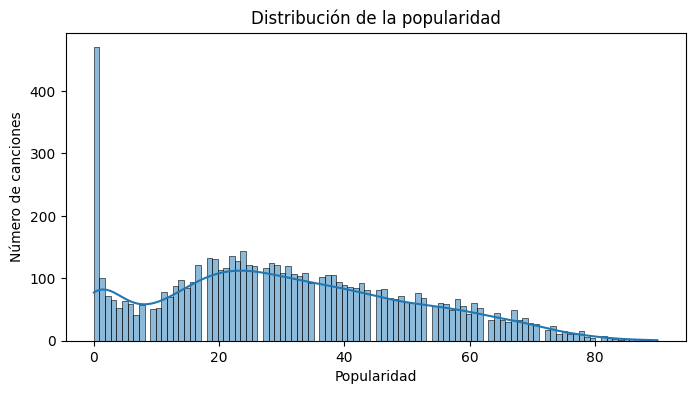

In [60]:
plt.figure(figsize=(8, 4)) # Crea una nueva figura de 8 pulgadas de ancho por 4 de alto.

# Uso de Seaborn para graficar un histograma de la columna popularity.
# El parámetro kde añade una curba de densidad que tiene como finalidad visualizar la forma de la distribución.
sns.histplot(spotify['popularity'], bins = 100, kde = True)

plt.title('Distribución de la popularidad') # Título del gráfico

plt.xlabel('Popularidad') # Nombre del eje x
plt.ylabel('Número de canciones') # Nombre del eje y
plt.show 

In [62]:
null_popularity = spotify[spotify['popularity'] == 0]
null_popularity

,id,name,genre,artists,album,popularity,duration_ms,explicit
6,3vpJdk93GzerZnlou6Ua0z,beautiful things - acoustic,acoustic,benson boone,daydream,0,201248,False
12,0i49QlMEbbbax1gZe2qQzm,too good at goodbyes - acoustic,acoustic,sam smith,hear the pride,0,220095,False
30,41DZa1qUamVuPPr7qrtbKw,whatcha say - acoustic,acoustic,jason derulo,heartbreaking pop,0,222520,False
38,5SCvmjq2tWZRxoQJ1DGLpK,acoustic,acoustic,david ai,just kidding,0,234700,False
44,0r5j1OxaqLkhxJOgA0kstj,acoustic,acoustic,xtravert,acoustic,0,153012,True
...,...,...,...,...,...,...,...,...
6192,6sciAxs1bBKdhJWflaJF4H,turkish,turkish,ewonee,fakie flip,0,95460,False
6194,7Cew1I0X8trm9234Wy4tqZ,turkish,turkish,sheva,sheva,0,544453,False
6197,2DPd7NUhXnWK7f8eETvC1w,turkish,turkish,"not breathing, rotorhead",dr. speedlove presents: chemical warfare ( mix...,0,294093,False
6201,5TGgGaDEya8pPL24heRKaG,work-out,work-out,"g.r.a.c.e., ozcashtheproducer",unorthodox,0,168509,True


In [63]:
null_rate = (len(null_popularity) / len(spotify)) * 100 # Cálculo del porcentaje de canciones con un índice de popularidad igual a cero
null_rate = round(null_rate, 2) # Redondeo del porcentaje a 2 decimales
print(str(null_rate) + '%')

7.46%


**Observaciones:**
- El 7.46% de las canciones registradas en el dataframe tienen un índice de popularidad de cero.
- Se observa que la distribución de las canciones presenta asimetría que podría indicar un sesgo ocasionado por el alto número de canciones (470) que tienen una puntuación de 0 en su popularidad. Es aconsejable validar si este dato es fiable revisando la metodología para calificar la popularidad de las canciones o la forma en que se tomaron los datos. Sin embargo, no se cuenta con dicha información, por lo que este informe asumirá que dicho comportamiento corresponde a que hay una mayor oferta de canciones de spotify que demanda de las mismas. Estudios como 

#### 2.7.1. Distribución de la duración en minutos.

In [67]:
spotify['duration_min'] = spotify['duration_ms'] / 60000 # Creación de columna que contiene la duración de cada canción en minutos
spotify.head()

,id,name,genre,artists,album,popularity,duration_ms,explicit,duration_min
0,7kr3xZk4yb3YSZ4VFtg2Qt,acoustic,acoustic,billy raffoul,1975,58,172199,False,2.869983
1,1kJygfS4eoVziBBI93MSYp,acoustic,acoustic,billy raffoul,a few more hours at yyz,57,172202,False,2.870033
2,6lynns69p4zTCRxmmiSY1x,here comes the sun - acoustic,acoustic,"molly hocking, bailey rushlow",here comes the sun (acoustic),42,144786,False,2.413100
3,1RC9slv335IfLce5vt9KTW,acoustic #3,acoustic,the goo goo dolls,dizzy up the girl,46,116573,False,1.942883
4,5o9L8xBuILoVjLECSBi7Vo,my love mine all mine - acoustic instrumental,acoustic,"guus dielissen, casper esmann",my love mine all mine (acoustic instrumental),33,133922,False,2.232033


<function matplotlib.pyplot.show(close=None, block=None)>

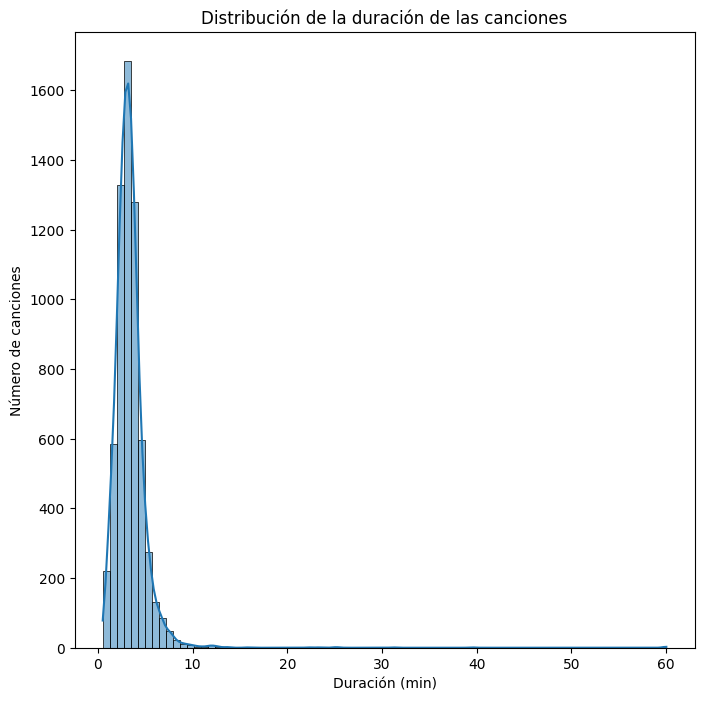

In [68]:
plt.figure(figsize=(8, 8)) # Crea una nueva figura de 8 pulgadas de ancho por 4 de alto.

# Uso de Seaborn para graficar un histograma de la columna duration_min.
# El parámetro kde añade una curba de densidad que tiene como finalidad visualizar la forma de la distribución.
sns.histplot(spotify['duration_min'], bins = 80, kde = True)

plt.title('Distribución de la duración de las canciones') # Título del gráfico

plt.xlabel('Duración (min)') # Nombre del eje x
plt.ylabel('Número de canciones') # Nombre del eje y
plt.show 

In [69]:
more_than_10_min = spotify[spotify['duration_min'] > 10]
more_than_10_min.count()

id              32
name            32
genre           32
artists         32
album           32
popularity      32
duration_ms     32
explicit        32
duration_min    32
dtype: int64

Se encuentran 32 canciones con duración mayor a 10 minutos. Se validan algunas de ellas al azar en spotify y su duración corresponde a la indicada en el dataset.

In [70]:
more_than_10_min = spotify[spotify['duration_min'] > 10]
more_than_10_min

,id,name,genre,artists,album,popularity,duration_ms,explicit,duration_min
50,6JZcfM5vr5O0KeGIAWiydu,afrobeat 2023 mixtape,afrobeat,dj funkybee,afrobeat 2023 mixtape,28,3601658,True,60.027633
60,2WRQhgXftM1G0NIXr7jNmc,afrobeats mix flight oso 149,afrobeat,osocity,afrobeats mix flight oso 149,26,2372414,True,39.540233
315,1XyOp2NySUezomjRilMF7y,the prison of mirrors,black-metal,xasthur,subliminal genocide,23,762586,False,12.709767
885,4IOWe9VVg8MK5IkQLeuOwh,"symphony no. 5, pt. 3: iv. adagietto",classical,"gustav mahler, david parry, london philharmoni...",the 50 greatest pieces of classical music,29,660706,False,11.011767
1281,7aZFSazqRVNfNI14u7QR2q,grand son of detroit techno,detroit-techno,"omar s, theo parrish",the grand son of detroit techno!,1,704893,False,11.748217
1298,5TRFywcS0o6pw7ULm6gXhV,consumed,detroit-techno,"plastikman, richie hawtin",consumed,24,700151,False,11.669183
1300,5jUA1njy3h6ynHLvPdEVHt,disco inferno,disco,the trammps,disco inferno,51,659000,False,10.983333
1526,5snX53qR49HRl7gmsKr7Pj,hol!,dubstep,hol!,hol!,25,701417,True,11.690283
1606,7MyNaeme4s4l9MfBjRHRe6,the electro suite,electro,"hans zimmer, the magnificent six, pharrell wil...",the amazing spider-man 2 (the original motion ...,37,756106,False,12.601767
1658,47t30Tl0EkQeiNbGFRANay,electronic,electronic,mind amend,add adhd intense relief 10hz to 40hz isochroni...,9,1500004,False,25.000067


## 3. Análisis de datos para responder preguntas guía

### 3.1. ¿Qué géneros musicales son más frecuentes en la playlist estudiada?

#### 3.1.1. Previsualización del dataset

Antes de empezar a analizar los datos, se previsualiza el dataset para determinar los métodos y columnas que se trabajarán para responder esta pregunta.

In [71]:
spotify.head()

,id,name,genre,artists,album,popularity,duration_ms,explicit,duration_min
0,7kr3xZk4yb3YSZ4VFtg2Qt,acoustic,acoustic,billy raffoul,1975,58,172199,False,2.869983
1,1kJygfS4eoVziBBI93MSYp,acoustic,acoustic,billy raffoul,a few more hours at yyz,57,172202,False,2.870033
2,6lynns69p4zTCRxmmiSY1x,here comes the sun - acoustic,acoustic,"molly hocking, bailey rushlow",here comes the sun (acoustic),42,144786,False,2.413100
3,1RC9slv335IfLce5vt9KTW,acoustic #3,acoustic,the goo goo dolls,dizzy up the girl,46,116573,False,1.942883
4,5o9L8xBuILoVjLECSBi7Vo,my love mine all mine - acoustic instrumental,acoustic,"guus dielissen, casper esmann",my love mine all mine (acoustic instrumental),33,133922,False,2.232033


**Método propuesto:**

- Obtener variables descriptivas de la columna **genre**.
- Realizar un conteo de los valores de la columna **genre** agrupados por género.
- Determinar el porcentaje de canciones que pertenecen a cada género.
- Generar un gráfico de pastel que permita identificar la distribución de las canciones por género.

#### 3.1.2. Obtención de las variables descriptivas de la columna *genre*

In [72]:
spotify['genre'].describe()

count         6300
unique         126
top       acoustic
freq            50
Name: genre, dtype: object

**Observaciones:**

- La playlist analizada contiene 126 géneros.
- El género más popular de la playlist es *acoustic* con 50 registros.

#### 3.1.3. Conteo de los valores de la columna *genre* agrupados por género

In [73]:
genres = spotify['genre'].value_counts()
genres = genres.reset_index()
genres

,genre,count
0,acoustic,50
1,afrobeat,50
2,alt-rock,50
3,alternative,50
4,ambient,50
...,...,...
121,trance,50
122,trip-hop,50
123,turkish,50
124,work-out,50


In [74]:
genres.describe()

,count
count,126.0
mean,50.0
std,0.0
min,50.0
25%,50.0
50%,50.0
75%,50.0
max,50.0


**Observaciones:**

- Se observa que, al contar la cantidad de registros de cada género, todos cuentan con el mismo número de canciones en la playlist (50). Por lo que todos tienen la misma presencia.
- Teniendo en cuenta lo anterior. No es posible determinar un género que tenga más presencia en el dataset estudiado.

#### 3.1.4. Determinar el porcentaje de canciones que pertenecen a cada género

In [75]:
genres['rate'] = genres['count'] / (genres['count'].sum())
genres = genres.sort_values(by = 'count')
genres.head()

,genre,count,rate
0,acoustic,50,0.007937
1,afrobeat,50,0.007937
2,alt-rock,50,0.007937
3,alternative,50,0.007937
4,ambient,50,0.007937


#### 3.1.5. Generar un gráfico de pastel que permita identificar la distribución de las canciones por género.

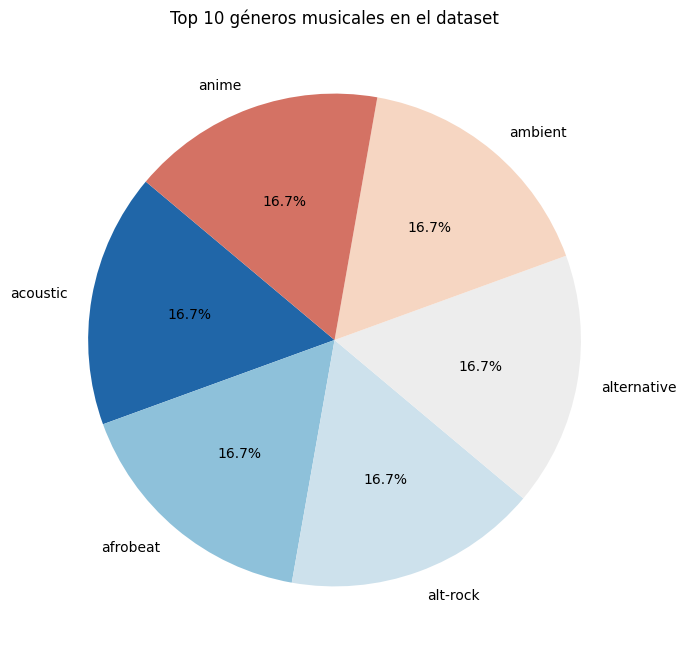

In [76]:
plt.figure(figsize = (8, 8))
custom_palette = ['#2066a8', '#8ec1da', '#cde1ec', '#ededed', '#f6d6c2', '#d47264', '#ae282c']
top_genres = genres.head(6) # Selección de los géneros más comunes (a pesar de que todos tienen la misma presencia)
plt.pie(top_genres['count'], labels = top_genres['genre'], autopct='%1.1f%%', startangle=140, colors = custom_palette)
plt.title('Top 10 géneros musicales en el dataset')
plt.show()


### 3.2. ¿Qué artistas musicales tienen mayor presencia?

#### 3.2.1. Previsualización del dataset

Antes de empezar a analizar los datos, se previsualiza el dataset para determinar los métodos y columnas que se trabajarán para responder esta pregunta.

In [77]:
spotify.head()

,id,name,genre,artists,album,popularity,duration_ms,explicit,duration_min
0,7kr3xZk4yb3YSZ4VFtg2Qt,acoustic,acoustic,billy raffoul,1975,58,172199,False,2.869983
1,1kJygfS4eoVziBBI93MSYp,acoustic,acoustic,billy raffoul,a few more hours at yyz,57,172202,False,2.870033
2,6lynns69p4zTCRxmmiSY1x,here comes the sun - acoustic,acoustic,"molly hocking, bailey rushlow",here comes the sun (acoustic),42,144786,False,2.413100
3,1RC9slv335IfLce5vt9KTW,acoustic #3,acoustic,the goo goo dolls,dizzy up the girl,46,116573,False,1.942883
4,5o9L8xBuILoVjLECSBi7Vo,my love mine all mine - acoustic instrumental,acoustic,"guus dielissen, casper esmann",my love mine all mine (acoustic instrumental),33,133922,False,2.232033


**Método propuesto:**

- Obtener variables descriptivas de la columna **artists**.
- Realizar un conteo de los valores de la columna **artists** agrupados por género.
- Determinar el porcentaje de canciones que pertenecen a cada artista.
- Generar un gráfico de pastel que permita identificar la distribución de las canciones en los artistas más escuchados.

#### 3.2.2. Obtención de las variables descriptivas de la columna *artists*

In [78]:
spotify['artists'].describe()

count          6300
unique         4649
top       metallica
freq             22
Name: artists, dtype: object

**Observaciones:**

- Hay canciones de 4649 artistas diferentes en la lista.
- El artista con más canciones en la lista es Metallica, con 22 canciones.

#### 3.2.3. Porcentaje de canciones que pertenecen a cada artista

In [79]:
artists = spotify.groupby('artists').agg({'name':'count',
                                          'album':'count',
                                          'explicit':'mean',
                                          'popularity' : 'mean'
                                          })
artists = artists.reset_index()
artists = artists.sort_values(by = 'name', ascending = False)
artists.columns = ['artists', 'n_songs', 'n_albums', 'explicit_rate', 'popularity_avg']
artists['n_songs_percentage'] = (artists['n_songs'] / (artists['n_songs'].sum()))*100
artists.head()

,artists,n_songs,n_albums,explicit_rate,popularity_avg,n_songs_percentage
2706,metallica,22,22,0.090909,52.363636,0.349206
3034,one ok rock,20,20,0.200000,40.650000,0.317460
777,chicago house selection,18,18,0.000000,0.000000,0.285714
1015,death,17,17,0.000000,36.176471,0.269841
3270,progressive house sessions,16,16,0.000000,0.000000,0.253968


#### 3.2.4. Gráfico de pastel artistas más populares

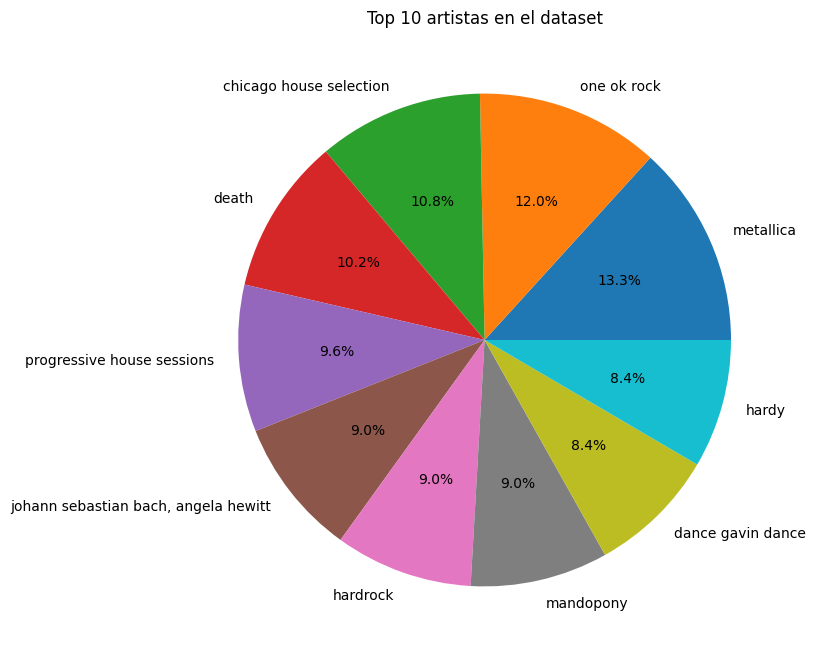

In [80]:
plt.figure(figsize = (8, 8))
top_artists = artists.head(10) # Selección de los géneros más comunes (a pesar de que todos tienen la misma presencia)
plt.pie(top_artists['n_songs'], labels = top_artists['artists'], autopct='%1.1f%%', startangle=0)
plt.title('Top 10 artistas en el dataset')
plt.show()

**Observaciones:**

- Los artistas con más canciones son Metallica (22 registros), One Ok Rock (20 registros), Chicago House Selection (18 registros), Death (17 registros), Progressive House Sessions (16 registros).

### 3.3. ¿Cuánto tiempo en promedio duran las canciones que componen la playlist?

#### 3.3.1. Previsualización del dataset

Antes de empezar a analizar los datos, se previsualiza el dataset para determinar los métodos y columnas que se trabajarán para responder esta pregunta.

In [81]:
spotify.head()

,id,name,genre,artists,album,popularity,duration_ms,explicit,duration_min
0,7kr3xZk4yb3YSZ4VFtg2Qt,acoustic,acoustic,billy raffoul,1975,58,172199,False,2.869983
1,1kJygfS4eoVziBBI93MSYp,acoustic,acoustic,billy raffoul,a few more hours at yyz,57,172202,False,2.870033
2,6lynns69p4zTCRxmmiSY1x,here comes the sun - acoustic,acoustic,"molly hocking, bailey rushlow",here comes the sun (acoustic),42,144786,False,2.413100
3,1RC9slv335IfLce5vt9KTW,acoustic #3,acoustic,the goo goo dolls,dizzy up the girl,46,116573,False,1.942883
4,5o9L8xBuILoVjLECSBi7Vo,my love mine all mine - acoustic instrumental,acoustic,"guus dielissen, casper esmann",my love mine all mine (acoustic instrumental),33,133922,False,2.232033


**Método propuesto:**

- Obtener variables descriptivas de la columna **duration_min**.
- Determinar los percentiles 25 y 75 de la columna **duration_min** para evitar la influencia de datos atípicos.
- Generar un histograma que permita identificar la distribución de las canciones en los artistas más escuchados.

#### 3.3.2. Variables descriptivas de la columna *duration_min*

In [94]:
duration_descriptives = spotify['duration_min'].describe().round(2)

In [98]:
duration_descriptives

count    6300.00
mean        3.38
std         2.02
min         0.50
25%         2.46
50%         3.19
75%         3.95
max        60.03
Name: duration_min, dtype: float64

In [102]:
deviation = round(((duration_descriptives['mean'] - duration_descriptives['50%']) / duration_descriptives['50%']) * 100 , 2)
print('La desviación entre la media y la mediana es de ' + str(deviation) + '%')

La desviación entre la media y la mediana es de 5.96%


**Observaciones:**

- Las canciones de la playlist tienen una duración promedio de 3.38 minutos.
- Se encuentran datos atípicos, como canciones con una duración de hasta 60 minutos.
- Para evitar influencia de los datos atípicos, se calcula la media y los cuartiles 1 y 3 con el fin de validar qué duración tienden a tener los datos de la playlist.
- El 50% de los datos tienen duraciones entre 2.46 minutos y 3.95 minutos.
- La mediana de la duración de los datos es 3.19 minutos.
- La diferencia entre la media y la mediana es de 5.96%, por lo cual, es posible afirmar que los datos atíficos no influyen de forma significativa en la media.